# Analisi dei sentimenti riguardanti Apple



I dati reperiti al seguente link https://data.world/crowdflower/apple-twitter-sentiment si riferiscono ad una raccolta di tweet riguardanti Apple. L'obiettivo è suddividere i tweet in positivi o negativi e successivamente, ricavare quali siano le parole chiave più indicative per descrivere i due stati d'animo nei confronti della compagnia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import re

## Import del Dataset e Pulizia
I dati di partenza vengono ripuliti dalle colonne non significative ai fini dell'analisi.

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisi Sentimento Apple/Apple-Twitter-Sentiment-DFE.csv", encoding="latin-1")

#eliminatione NaN e "dont care"
data = data[data["sentiment"]!="3"]
data = data[data["sentiment"]!="not_relevant"]
data = data.reset_index()

#eliminazione delle colonne inutili
data = data.drop(["index", "_unit_id", "_golden", "_unit_state", "_trusted_judgments", "_last_judgment_at", "date","id","query", "sentiment_gold"], axis =1)

#funzione che dicotomizza le risposte
def encoder(x):
    if x=="5":
        return 1
    else:
        return 0

data["sentiment"] = data["sentiment"].apply(encoder)

data.head()

,sentiment,sentiment:confidence,text
0,1,0.8468,Top 3 all @Apple #tablets. Damn right! http://...
1,1,0.6736,CNBCTV: #Apple's margins better than expected?...
2,0,1.0000,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
3,1,1.0000,RT @peterpham: Bought my @AugustSmartLock at t...
4,0,1.0000,@apple Contact sync between Yosemite and iOS8 ...


In [4]:
print("\n\nSentiment Values: ")
print(data.sentiment.value_counts())



Sentiment Values: 
0    1219
1     423
Name: sentiment, dtype: int64


Si osserva che ci sono molti più tweet negativi rispetto a quelli positivi.

In [5]:
from sklearn.model_selection import train_test_split

#rimozione dei caratteri speciali
def standardize_text(data, text_field):
    data[text_field] = data[text_field].str.replace(r"http\S+", "")
    data[text_field] = data[text_field].str.replace(r"http", "")
    data[text_field] = data[text_field].str.replace(r"@\S+", "")
    data[text_field] = data[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    data[text_field] = data[text_field].str.replace(r"@", "at")
    data[text_field] = data[text_field].str.lower()
    return data

data = standardize_text(data, "text")
data.to_csv("clean_apple.csv")
data.head()

<ipython-input-5-53ff821b8c4a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[text_field] = data[text_field].str.replace(r"http\S+", "")
<ipython-input-5-53ff821b8c4a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data[text_field] = data[text_field].str.replace(r"@\S+", "")
<ipython-input-5-53ff821b8c4a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data[text_field] = data[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


,sentiment,sentiment:confidence,text
0,1,0.8468,top 3 all tablets damn right!
1,1,0.6736,cnbctv apple's margins better than expected?...
2,0,1.0000,wtf my battery was 31 one second ago and now ...
3,1,1.0000,rt bought my at the store pretty good logo...
4,0,1.0000,contact sync between yosemite and ios8 is ser...


##  Token
Le stringhe di testo vengono convertite in Token.

In [6]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
data["tokens"] = data["text"].apply(tokenizer.tokenize)
data.head()

,sentiment,sentiment:confidence,text,tokens
0,1,0.8468,top 3 all tablets damn right!,"[top, 3, all, tablets, damn, right]"
1,1,0.6736,cnbctv apple's margins better than expected?...,"[cnbctv, apple, s, margins, better, than, expe..."
2,0,1.0000,wtf my battery was 31 one second ago and now ...,"[wtf, my, battery, was, 31, one, second, ago, ..."
3,1,1.0000,rt bought my at the store pretty good logo...,"[rt, bought, my, at, the, store, pretty, good,..."
4,0,1.0000,contact sync between yosemite and ios8 is ser...,"[contact, sync, between, yosemite, and, ios8, ..."


Si osserva la distribuzione delle lunghezze delle frasi attraverso il conteggio dei tokens.

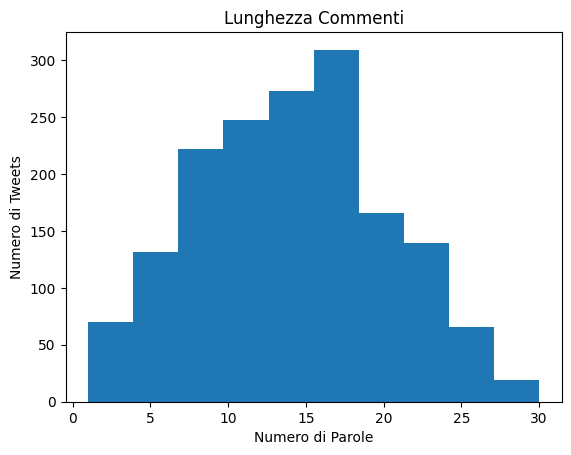

In [7]:
lunghezza_frase = [len(tokens) for tokens in data["tokens"]]
vocabolario = sorted(list(set([word for tokens in data["tokens"] for word in tokens])))

plt.xlabel("Numero di Parole")
plt.ylabel("Numero di Tweets")
plt.title("Lunghezza Commenti")
plt.hist(lunghezza_frase)
plt.show()

In [8]:
print("Numero di parole: ", len(vocabolario))

Numero di parole:  3701


## Da Token a Dati Numerici
La lista di token viene convertita in dati numerici.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = data[["text", "sentiment:confidence"]]
y = data["sentiment"]

#divisione dei dati per la cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,shuffle=True)

X_train_conf, X_test_conf = X_train["sentiment:confidence"], X_test["sentiment:confidence"]
X_train, X_test = X_train["text"], X_test["text"]

X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

print(X_train[:5])

1467    rt  protesters stage  diein protests in  store...
1137     ubs increases  apple's  iphone6 sales, revenu...
875                 wut?  can i have my money back? kthx 
226                         im sick of your fucking shit 
131     apple  loses ground to google  in education ta...
Name: text, dtype: object


In [20]:
#vettorizzazione
vect = TfidfVectorizer()
X_train_vett = vect.fit_transform(X_train)
X_test_vett = vect.transform(X_test)

X_train_vett[0]

<1x3355 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

### Grafico del Dataset
Scomposizione in valori singolari per ridurre la dimensione del dataset in una matrice di due dimensioni.

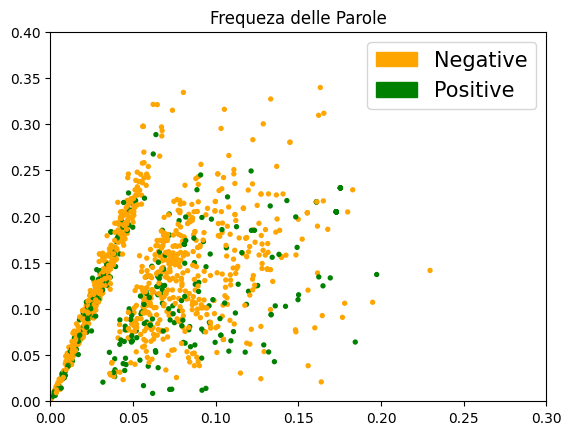

In [21]:
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_lsa(text, labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(text)
    lsa_scores = lsa.transform(text)
    color_dict = {label:idx for idx, label in enumerate(set(labels))}
    color_column = [color_dict[label] for label in labels]
    colors = ["orange", "green"]
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, c = labels, cmap = matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color="orange", label="Negative")
        green_patch = mpatches.Patch(color="green", label="Positive")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 15})

plot_lsa(X_train_vett, y_train)
plt.xlim(0,0.3)
plt.ylim(0,0.4)
plt.title("Frequeza delle Parole")
plt.show()

# Costruzione del Modello

I due modelli impiegati sono la regressione logistica e il Support Vector Classification SVC.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV()
logit.fit(X_train_vett, y_train)
y_pred_logit = logit.predict(X_test_vett)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(class_weight = "balanced")
pipe = Pipeline([("classifier", clf)])
fit_params = {"classifier__kernel":["rbf", "linear", "poly"],
          "classifier__degree":[2, 3, 4],
          "classifier__C":[0.01, 0.1, 1, 10]}

gs = GridSearchCV(pipe, fit_params, cv = 10, return_train_score = True)
gs.fit(X_train_vett, y_train)

print("Il miglior parametro (score {}):\n{}".format(gs.best_score_, gs.best_params_))

pipe.set_params(classifier__degree = gs.best_params_["classifier__degree"],
                classifier__kernel = gs.best_params_["classifier__kernel"],
               classifier__C = gs.best_params_["classifier__C"])
pipe.fit(X_train_vett, y_train)
y_pred = pipe.predict(X_test_vett)

Il miglior parametro (score 0.8466135662898253):
{'classifier__C': 10, 'classifier__degree': 2, 'classifier__kernel': 'linear'}


Il modello migliore ha un kernel lineare.

In [35]:
from sklearn.metrics import accuracy_score, classification_report

#Regressione Logistica
print("Accuratezza Regressione Logistica: ", accuracy_score(y_test, y_pred_logit))
print("\n")
print(classification_report(y_test,  y_pred_logit))

#SVM
print("\n\n Accuratezza SVM: ", accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test,  y_pred))

Accuratezza Regressione Logistica:  0.8623481781376519


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       185
           1       0.74      0.69      0.72        62

    accuracy                           0.86       247
   macro avg       0.82      0.81      0.81       247
weighted avg       0.86      0.86      0.86       247



 Accuratezza SVM:  0.854251012145749


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       185
           1       0.70      0.73      0.71        62

    accuracy                           0.85       247
   macro avg       0.81      0.81      0.81       247
weighted avg       0.86      0.85      0.86       247



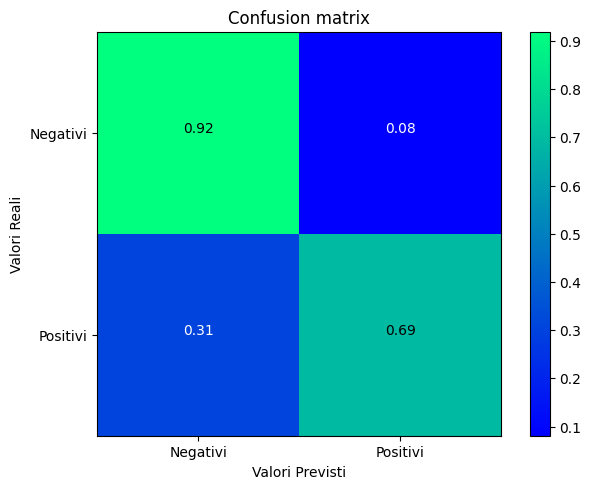

[[170  15]
 [ 19  43]]


In [36]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")

    plt.tight_layout()
    plt.ylabel("Valori Reali")
    plt.xlabel("Valori Previsti")
    return plt

cm = confusion_matrix(y_test, y_pred_logit)
fig = plt.figure()
plot = plot_confusion_matrix(cm, classes=["Negativi","Positivi"], normalize=True, title="Confusion matrix")
plt.show()
print(cm)

I falsi negativi presentano una proporzione abbastanza elevata, si osservano alcuni esempi di classificazione errata di commenti positivi ritenuti negativi.

In [37]:
def find_fn(ypred, ytrue):
    y_fn  = X_test[(ypred==0)&(ypred!=ytrue)]
    return y_fn

fn = find_fn(y_pred_logit, y_test)
print("Numero di Falsi Negativi", fn.shape, "\n")
print(fn[:1].values, "\n")
print(fn[1:2].values, "\n")
print(fn[2:3].values, "\n")
print(fn[3:4].values)

Numero di Falsi Negativi (19,) 

["  ikr! but u dont need to,bc i'll hopefully buy one on christmas if my grades are 17 20"] 

['apple inc  ceo donates  291k to pennsylvania school district   aapl'] 

[' i could not agree more  between   and  only great things will happen   appleandibm  ibmandtwitter'] 

['enjoying my studio wireless beats   ']


# Parole Chiave

In [47]:
def parole_chiave(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # ciclo eseguito per ogni classe
    classi ={}
    for indice_classe in range(model.coef_.shape[0]):
        importanza = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[indice_classe])]
        coefficiente = sorted(importanza, key = lambda x : x[0], reverse=True)
        top = sorted(coefficiente[:n], key = lambda x : x[0])
        bottom = coefficiente[-n:]
        classi[indice_classe] = {
            "top":top,
            "bottom":bottom
        }
    return classi

importance = parole_chiave(vect, logit, 10)

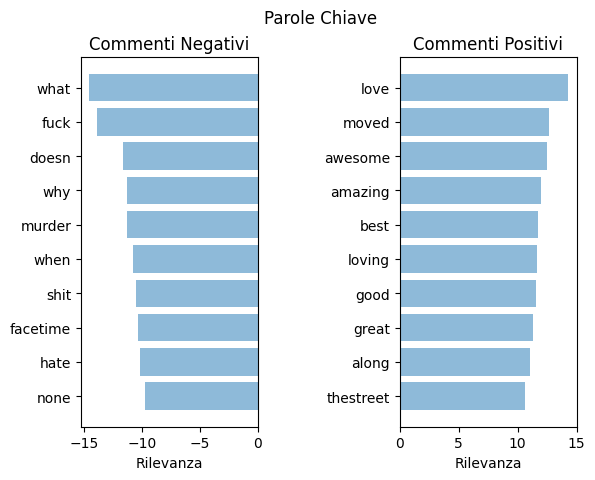

In [50]:
def grafico_parole_chiave(top_punti, top, bottom_punti, bottom, nome):
    y_pos = np.arange(len(top))
    top_pairs = [(a,b) for a,b in zip(top, top_punti)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom, bottom_punti)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top = [a[0] for a in top_pairs]
    top_punti = [a[1] for a in top_pairs]

    bottom = [a[0] for a in bottom_pairs]
    bottom_punti = [a[1] for a in bottom_pairs]

    fig = plt.figure()

    plt.subplot(121)
    plt.barh(y_pos, bottom_punti, align="center", alpha=0.5)
    plt.title("Commenti Negativi")
    plt.yticks(y_pos, bottom)
    plt.xlabel("Rilevanza")

    plt.subplot(122)
    plt.barh(y_pos, top_punti, align="center", alpha=0.5)
    plt.title("Commenti Positivi")
    plt.yticks(y_pos, top)
    plt.suptitle(nome)
    plt.xlabel("Rilevanza")

    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_punti = [a[0] for a in importance[0]["top"]]
top = [a[1] for a in importance[0]["top"]]
bottom_punti = [a[0] for a in importance[0]["bottom"]]
bottom = [a[1] for a in importance[0]["bottom"]]

grafico_parole_chiave(top_punti, top, bottom_punti, bottom, "Parole Chiave")

# Conclusione

Il modello costruito è in grado di classsificare i tweet riguardanti Apple in positivi e negativi con un'accuratezza del 86%. Da sottolineare la proporzione relativamente alta di falsi negativi 31%. Il modello è in grado anche di riconoscere le parole chiave più importanti per determinare sed un commento sia positivo o negativo.